# OSKM ChromVAR

Inputs:
1. Metadata for ATAC
2. ChromVAR Scores for OSKM with associated motif logos

In [70]:
library(ggplot2)
library(ggseqlogo)
library(scales)
library(patchwork)
library(cowplot)


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots




## Load Inputs

### Metadata

In [3]:
# Metadata file from previous run
# should contain, sample_barcode as rowname, sample, umap1, umap2, cluster
metaData = read.table("../../analysis/20200206_pmat_snapATAC/sessions/20201022_n53906/metadata.tsv", header = T)
rownames(metaData) = paste(metaData$sample, metaData$barcode, sep='_')
metaData$cells = rownames(metaData) # for cicero
dim(metaData)
head(metaData, 5)

[1] 53906     6

,barcode,sample,umap1,umap2,cluster,cells
,<fct>,<fct>,<dbl>,<dbl>,<int>,<chr>
D0_AACGCGAGAAGGACCA,AACGCGAGAAGGACCA,D0,8.373301,-4.292619,5,D0_AACGCGAGAAGGACCA
D0_AACGCGCTGTCTGTGA,AACGCGCTGTCTGTGA,D0,2.033609,-7.860645,5,D0_AACGCGCTGTCTGTGA
D0_ACCTATGGACTCGATA,ACCTATGGACTCGATA,D0,3.093788,-7.469210,5,D0_ACCTATGGACTCGATA
D0_ACGCAGAGATAACCCA,ACGCAGAGATAACCCA,D0,6.001364,-7.523576,5,D0_ACGCAGAGATAACCCA
D0_ACTCGCTACTTGTGAC,ACTCGCTACTTGTGAC,D0,3.343237,-8.114589,5,D0_ACTCGCTACTTGTGAC


### ChromVAR Scores

In [4]:
OSKM_cv = read.table("../../analysis/20200522_OSK_frip/sessions/20201022_n53906/OSKM_ChromVAR_dev_top50k_hits.tsv")
head(OSKM_cv)

,POU5F1,SOX2,KLF4,MYC
,<dbl>,<dbl>,<dbl>,<dbl>
D0_AACGCGAGAAGGACCA,-0.1509006,-0.02867789,-0.06773534,-0.002706278
D0_AACGCGCTGTCTGTGA,-0.1507773,-0.05342948,-0.05475705,-0.028081874
D0_ACCTATGGACTCGATA,-0.1569081,-0.04314643,-0.03866246,0.023401176
D0_ACGCAGAGATAACCCA,-0.1442246,-0.06900680,-0.06142933,-0.001843167
D0_ACTCGCTACTTGTGAC,-0.1283466,-0.12835569,-0.12708557,-0.103474032
D0_AGACTACTGGCAGTTT,-0.1275711,-0.07020730,-0.06762387,-0.030886109


In [27]:
all(rownames(OSKM_cv) == rownames(metaData))

[1] TRUE

### Motif PFMs

In [12]:
O_pfm

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.37990,0.27475,0.96790,0.00633,0.05467,0.04064,0.89645,0.80525,0.93640,0.19491,0.26506
0.09837,0.21237,0.00930,0.00991,0.01464,0.78618,0.01007,0.05262,0.02059,0.16044,0.18682
0.15220,0.14549,0.01746,0.00511,0.88234,0.04179,0.00900,0.07824,0.01960,0.15792,0.27078
0.36953,0.36739,0.00534,0.97865,0.04834,0.13139,0.08449,0.06390,0.02341,0.48673,0.27734


In [18]:
O_pfm = as.matrix(read.table("../../analysis/20200522_OSK_frip/data/20201022_n53906/pfms/POU5F1_MA1115.1.pfm"))
S_pfm = as.matrix(read.table("../../analysis/20200522_OSK_frip/data/20201022_n53906/pfms/SOX2_HUMAN.H11MO.0.A.pfm"))
K_pfm = as.matrix(read.table("../../analysis/20200522_OSK_frip/data/20201022_n53906/pfms/KLF4_HUMAN.H11MO.0.A.pfm"))
M_pfm = as.matrix(read.table("../../analysis/20200522_OSK_frip/data/20201022_n53906/pfms/MYC_HUMAN.H11MO.0.A.pfm"))

In [20]:
rownames(O_pfm) = c("A", "C", "G", "T")
rownames(S_pfm) = c("A", "C", "G", "T")
rownames(K_pfm) = c("A", "C", "G", "T")
rownames(M_pfm) = c("A", "C", "G", "T")

## Plotting

In [143]:
plot_chromvar <- function(dev) {
    df = data.frame(metaData, n=dev)
    # shuffle so days don't overlap
    df = df[sample(dim(df)[1]), ]
    
    p <- ggplot(df) +
    geom_point(size=0.2, stroke=0, alpha=1, aes(x=umap1 , y=umap2, col=n)) +
    scale_color_viridis_c(limit=c(quantile(dev, 0.1),
                                  quantile(dev, 0.95)), 
                          oob = squish, name='ChromVAR \nDeviation\n',
                         option="A") +
#     ggtitle(sprintf("ChromVAR Deviations for %s", cur_pattern)) + 
    theme_classic() +
        xlab("UMAP 1") + ylab("UMAP 2") +
    theme(plot.title = element_text(hjust = 0.5),
              text = element_text(size=12),
              axis.line=element_blank(),
              axis.text.x=element_blank(),
              axis.text.y=element_blank(),
              axis.ticks=element_blank(),
              legend.position="none", #"bottom",
#               legend.justification = "right",
              panel.border = element_rect(colour = "black", fill=NA, size=0.5)) +
    coord_fixed()
    
    p
}

In [236]:
GENE = "SOX2"
logo_pfm = S_pfm

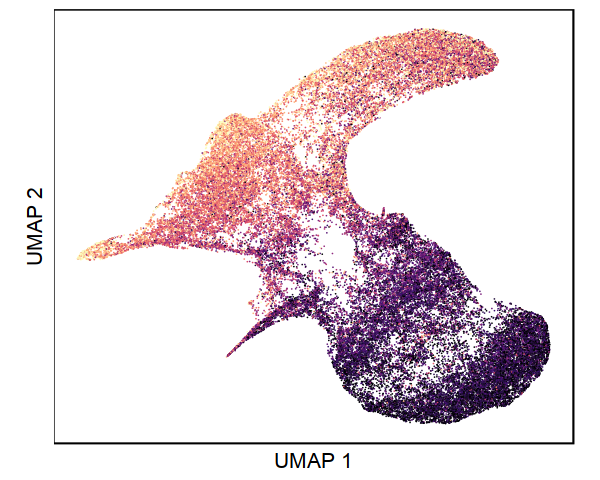

In [237]:
options(repr.plot.width = 5, repr.plot.height = 4)

umap_plot <- plot_chromvar(OSKM_cv[,GENE])

umap_plot

In [238]:
legend = cowplot::get_legend(umap_plot + theme(legend.position="bottom", 
                                               legend.text=element_text(angle=90, hjust=1)))

In [239]:
options(repr.plot.width = 2, repr.plot.height = 1)

logo <- ggseqlogo(as.matrix(logo_pfm)) +
scale_y_continuous(expand = c(0, 0)) +
theme(axis.text.x = element_blank(),
     axis.text.y = element_blank(),
     axis.title.y = element_blank(), 
#       plot.background = element_rect(fill = 'green', colour = 'red'), # for visualizing padding
     axis.ticks.length = unit(0, "pt"), #length of tick marks
     panel.grid.major=element_blank(),
     panel.grid.minor=element_blank(),
     plot.margin = margin(5, -10, -10, 0, "pt"))

logo_w_legend = wrap_plots(#plot_spacer(), 
                           logo,
                           legend,
                           #plot_spacer(), 
                           widths=c(2,3))

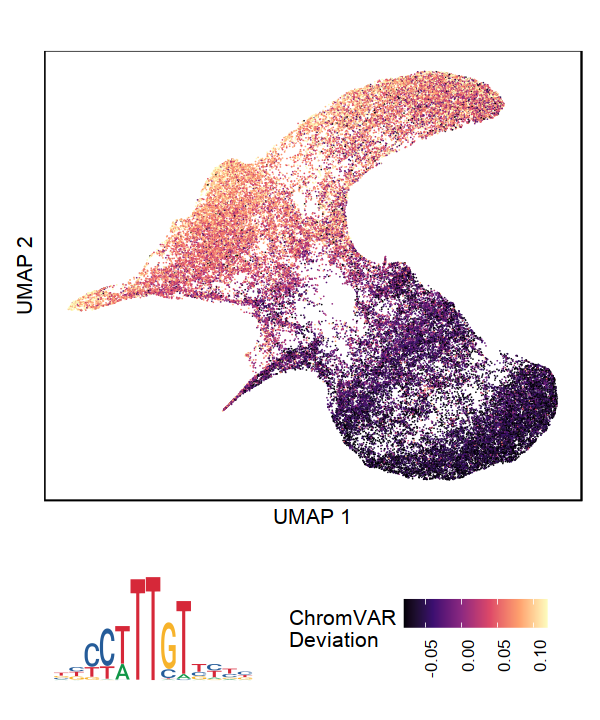

In [240]:
options(repr.plot.width = 5, repr.plot.height = 6)

combined_plot <- wrap_plots(umap_plot,
                            logo_w_legend,
                            heights=c(5,1))

combined_plot

In [241]:
saveRDS(combined_plot, file=sprintf("./subfigs/%s_%s_chromvar.rds",
                                   format(Sys.Date(), "%Y%m%d"), GENE))